In [317]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as stats
import seaborn as sns

%pwd
#os.chdir('C:\\Users\\Prudhvi\\Desktop\\Prudhvi\\Data Science\\Data')
os.chdir('C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data')
%pwd

'C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data'

In [291]:
churn=pd.read_csv("Teleco_Cust_Attr.csv")

In [296]:
print(stats.ttest_1samp(churn["tenure"],0.58))

print(churn["tenure"].mean())
print(np.var(churn["tenure"]))
print(np.std(churn["tenure"]))
print(churn["tenure"].var())

Ttest_1sampResult(statistic=108.63402696849658, pvalue=0.0)
32.37114865824223
603.0824673302961
24.55773742286321
603.1681081237256


In [316]:
## This is to test the ttest--- not working correctly still working on it--- t-value is correct --- we have to work on p value

N=churn["customerID"].count()
print(N)
var_a = churn["tenure"].var(ddof=1)
var_b = churn["MonthlyCharges"].var(ddof=1)
s = np.sqrt((var_a + var_b)/2)
t = (churn["tenure"].mean() - churn["MonthlyCharges"].mean())/(s*np.sqrt(2/N))
print(t)
df = 2*N - 2
p = 1 - stats.t.cdf(t,df=df)
print(p)

7043
-69.98630233551279
1.0


NameError: name 'ip' is not defined

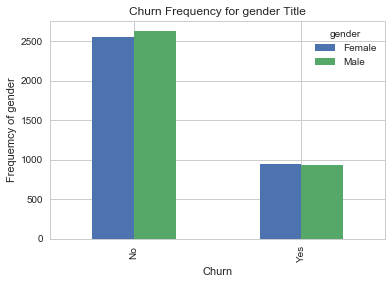

In [319]:
%matplotlib inline
pd.crosstab(churn.Churn,churn.gender).plot(kind='bar')
plt.title('Churn Frequency for gender Title')
plt.xlabel('Churn')
plt.ylabel('Frequemcy of gender')
plt.savefig('gender_Freq_Graph')

my_tab = pd.crosstab(index=churn["Churn"],  # Make a crosstab
            columns="count")      # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["gender"],margins=True)
#survived_class.columns = ["class1","class2","class3","rowtotal"]
#survived_sex.index= ["Yes","No"]
survived_sex

col_0  count
Churn       
No      5174
Yes     1869


Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


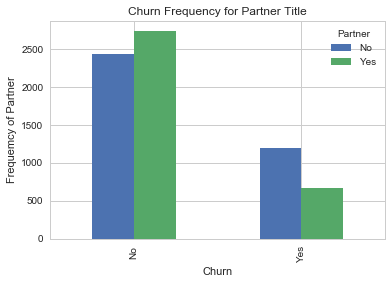

In [281]:
%matplotlib inline
pd.crosstab(churn.Churn,churn.Partner).plot(kind='bar')
plt.title('Churn Frequency for Partner Title')
plt.xlabel('Churn')
plt.ylabel('Frequemcy of Partner')
plt.savefig('Partner_Freq_Graph')

my_tab = pd.crosstab(index=churn["Churn"],  # Make a crosstab
            columns="count")   # Name the count column
print(my_tab)
# Table of survival vs. sex Table o 
survived_sex = pd.crosstab(index=churn["Churn"], columns=churn["Partner"])
#survived_sex.index= ["Yes","No"]
survived_sex

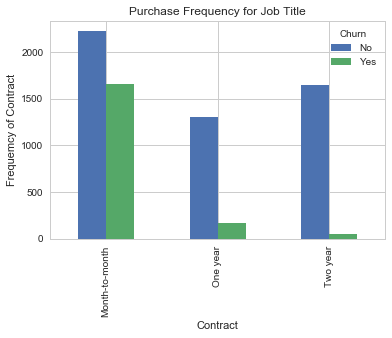

In [259]:
%matplotlib inline
pd.crosstab(churn.Contract,churn.Churn).plot(kind='bar')
plt.title('Churn Frequency for Contract Title')
plt.xlabel('Contract')
plt.ylabel('Frequemcy of Contract')
plt.savefig('Contract_Freq_Graph')

In [233]:
## Preprocessing
churn.loc[churn.OnlineSecurity=="No internet service","OnlineSecurity"]="No"
churn.loc[churn.OnlineBackup=="No internet service","OnlineBackup"]="No"
churn.loc[churn.DeviceProtection=="No internet service","DeviceProtection"]="No"
churn.loc[churn.TechSupport=="No internet service","TechSupport"]="No"
churn.loc[churn.StreamingTV=="No internet service","StreamingTV"]="No"
churn.loc[churn.StreamingMovies=="No internet service","StreamingMovies"]="No"
churn.loc[churn.MultipleLines=="No internet service","MultipleLines"]="No"

## Data Type Conversion
churn["SeniorCitizen"]=churn["SeniorCitizen"].astype(object)

total_rows = churn['Churn'].count()
for i in range(0,total_rows):
    churn.loc[i,"Charges"]=churn.loc[i,"tenure"]/churn.loc[i,"MonthlyCharges"]

cat_vars=['Contract','gender',"Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","PaperlessBilling","PaymentMethod","SeniorCitizen","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(churn[var], prefix=var)
    data1=churn.join(cat_list)
    churn=data1

## Deleting the columns
cat_vars=['customerID','MonthlyCharges','TotalCharges','tenure','Contract','gender',"Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","PaperlessBilling","PaymentMethod","SeniorCitizen","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
data_vars=churn.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

##Data to keep
data_final=churn[to_keep]
data_final.columns.values

data_final_vars=data_final.columns.values.tolist()
y=['Churn']
X=[i for i in data_final_vars if i not in y]
print(X)

X=data_final[X]
y=data_final[y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['Charges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'SeniorCitizen_0', 'SeniorCitizen_1', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes']


In [283]:
classifier = LogisticRegression(random_state=0)
print(classifier)
result=classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(result.coef_))], axis = 1)
print(coefficients)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\KASTU1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7999645012424565
                                          0         0
0                                   Charges -1.750577
1                   Contract_Month-to-month  0.708879
2                         Contract_One year -0.018303
3                         Contract_Two year -0.820843
4                             gender_Female -0.035362
5                               gender_Male -0.094905
6                                Partner_No -0.070811
7                               Partner_Yes -0.059456
8                             Dependents_No  0.006544
9                            Dependents_Yes -0.136811
10                          PhoneService_No  0.145318
11                         PhoneService_Yes -0.275585
12                         MultipleLines_No -0.217667
13           MultipleLines_No phone service  0.145318
14                        MultipleLines_Yes -0.057918
15                      InternetService_DSL -0.123989
16              InternetService_Fiber optic  0.544163
17       

In [242]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_train, y_pred_train)
classification_report = classification_report(y_train, y_pred_train)
print(confusion_matrix)
print(classification_report)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']
[[3713  425]
 [ 702  794]]
             precision    recall  f1-score   support

         No       0.84      0.90      0.87      4138
        Yes       0.65      0.53      0.58      1496

avg / total       0.79      0.80      0.79      5634



In [236]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.80


In [238]:
y_pred_test = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred_test)
classification_report = classification_report(y_test, y_pred_test)
print(confusion_matrix)
print(classification_report)

[[931 105]
 [154 219]]
             precision    recall  f1-score   support

         No       0.86      0.90      0.88      1036
        Yes       0.68      0.59      0.63       373

avg / total       0.81      0.82      0.81      1409



In [100]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82
